Saving Kids_ScreenTime_Cleaned.csv to Kids_ScreenTime_Cleaned.csv


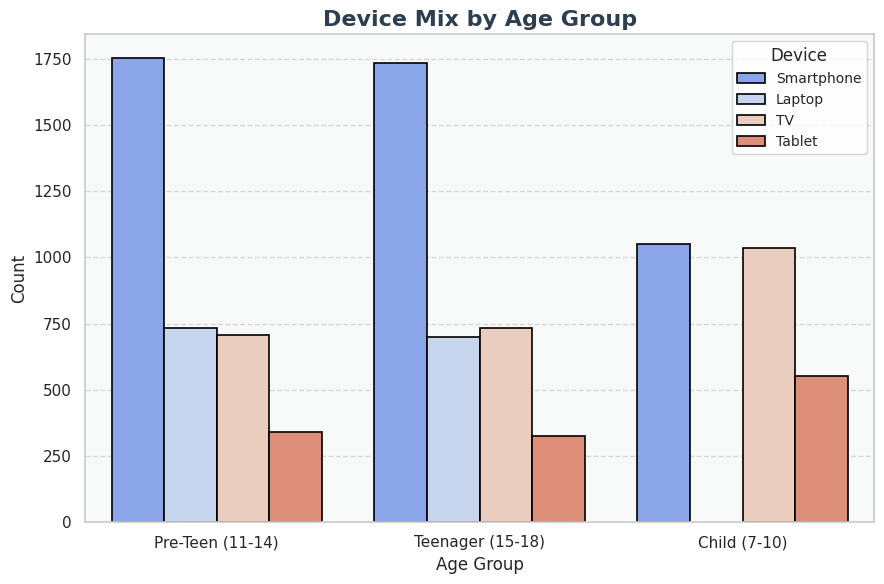

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the uploaded filename
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)

# Set theme
sns.set_theme(style='whitegrid', palette='Set2')

# Create styled plot
plt.figure(figsize=(9,6))
sns.countplot(
    x='Age_Group',
    hue='Primary_Device',
    data=df,
    palette='coolwarm',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Device Mix by Age Group', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Device', title_fontsize=12, fontsize=10, loc='upper right', frameon=True)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#F8F9F9')
plt.tight_layout()
plt.show()


Chart: Device Mix by Age Group
Type: Count Plot (Bar Chart with Hue)

Purpose: Shows how different age groups prefer different primary devices (e.g., Mobile, Laptop, Tablet).

What it tells: You can easily compare device popularity across age brackets for instance, younger users might prefer mobile devices, while older ones may lean toward desktops.

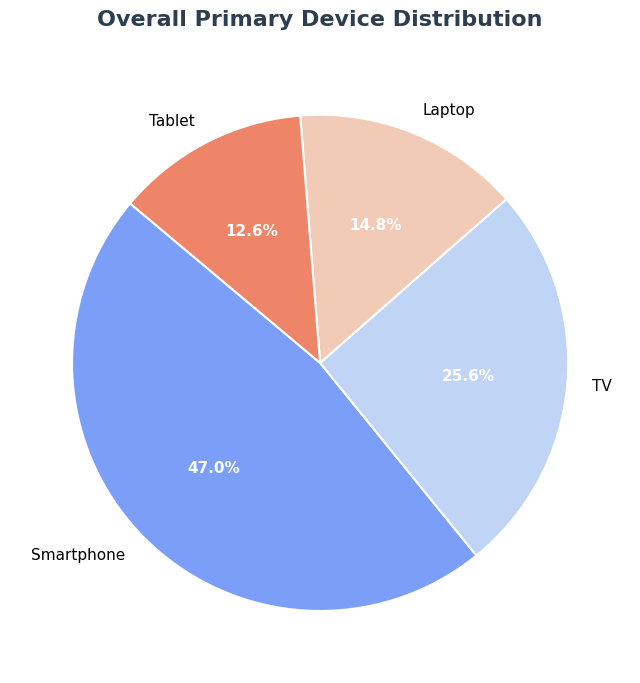

In [2]:
# Pie Chart: Overall Device Usage Distribution
device_counts = df['Primary_Device'].value_counts()

plt.figure(figsize=(7,7))
colors = sns.color_palette("coolwarm", len(device_counts))

wedges, texts, autotexts = plt.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': "black", 'fontsize': 11},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Styling
plt.setp(autotexts, size=11, weight='bold', color='white')
plt.title("Overall Primary Device Distribution", fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
plt.gca().set_facecolor('#F8F9F9')
plt.tight_layout()
plt.show()


Chart: Overall Primary Device Distribution
Type: Pie Chart

Purpose: Displays the overall proportion of users based on their primary device usage.

What it tells: Quickly shows which device type (e.g., Mobile, Laptop, Desktop) is most popular among all users.

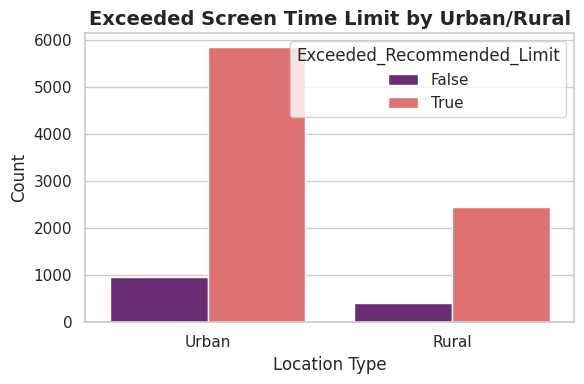

In [3]:
# #5 Count Plot: Exceeded Screen Time Limit by Urban/Rural
plt.figure(figsize=(6,4))
sns.set_theme(style='whitegrid')

sns.countplot(
    x='Urban_or_Rural',
    hue='Exceeded_Recommended_Limit',
    data=df,
    palette='magma'
)

plt.title('Exceeded Screen Time Limit by Urban/Rural', fontsize=14, fontweight='bold')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Chart: Exceeded Screen Time Limit by Urban/Rural
Type: Count Plot

Purpose: Compares how urban and rural users differ in exceeding recommended screen time.

What it tells: Highlights if location influences screen time habits.

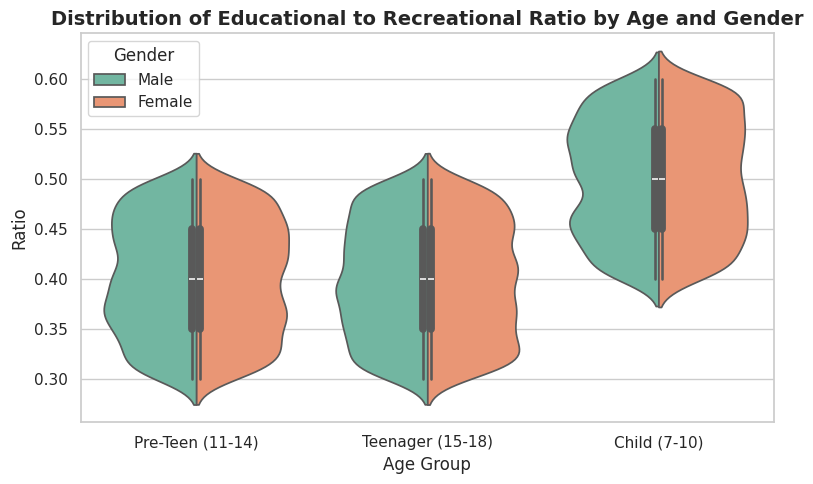

In [4]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x='Age_Group',
    y='Educational_to_Recreational_Ratio',
    hue='Gender',
    data=df,
    split=True,
    palette='Set2'
)

plt.title('Distribution of Educational to Recreational Ratio by Age and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()


Chart: Educational to Recreational Ratio by Age Group and Gender
Type: Violin Plot

Purpose: Compares the ratio of educational to recreational screen time across different age groups and genders.

What it tells: Highlights trends or differences between genders and how the balance between educational and recreational activities changes with age.

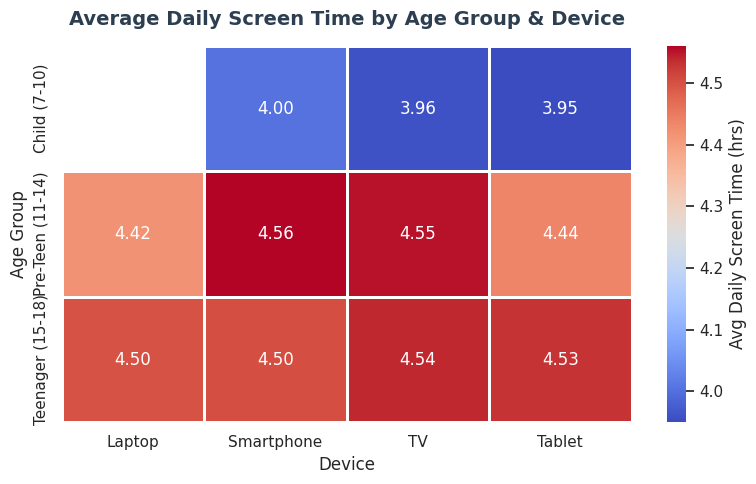

In [5]:

heatmap_data = df.pivot_table(
    values='Avg_Daily_Screen_Time_hr',
    index='Age_Group',
    columns='Primary_Device',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.set_theme(style='white')

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.8,
    linecolor='white',
    cbar_kws={'label': 'Avg Daily Screen Time (hrs)'}
)

plt.title('Average Daily Screen Time by Age Group & Device', fontsize=14, fontweight='bold', color='#2C3E50', pad=15)
plt.xlabel('Device')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


Chart: Average Daily Screen Time by Age Group & Device
Type: Heatmap

Purpose: Shows the average daily screen time (in hours) for different age groups across device types.

What it tells: Highlights which age groups spend more time on specific devices, making it easy to compare usage patterns at a glance.

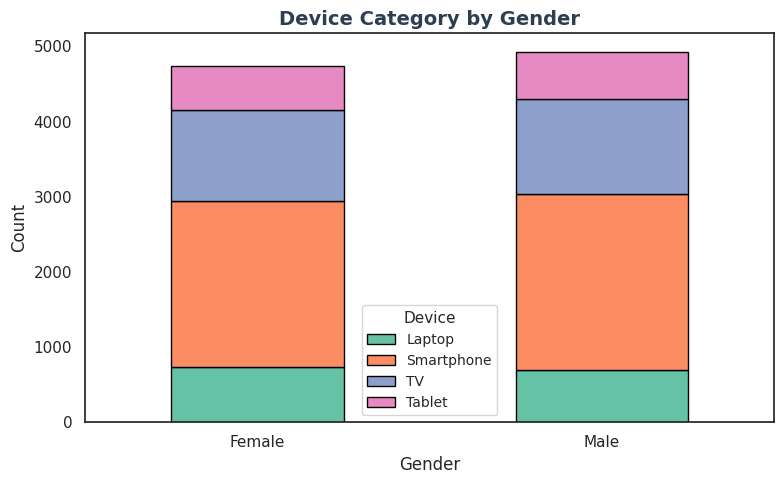

In [6]:

device_cat_gender = pd.crosstab(df['Gender'], df['Primary_Device'])

# Plot stacked bar chart
device_cat_gender.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=sns.color_palette("Set2", len(device_cat_gender.columns)),
    edgecolor='black'
)

plt.title('Device Category by Gender', fontsize=14, fontweight='bold', color='#2C3E50')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.legend(title='Device', title_fontsize=11, fontsize=10, frameon=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Chart: Device Category by Gender
Type: Stacked Bar Chart

Purpose: Compares the distribution of device categories between male and female users.

What it tells: Highlights which devices are more commonly used by each gender and allows quick visual comparison of preferences.

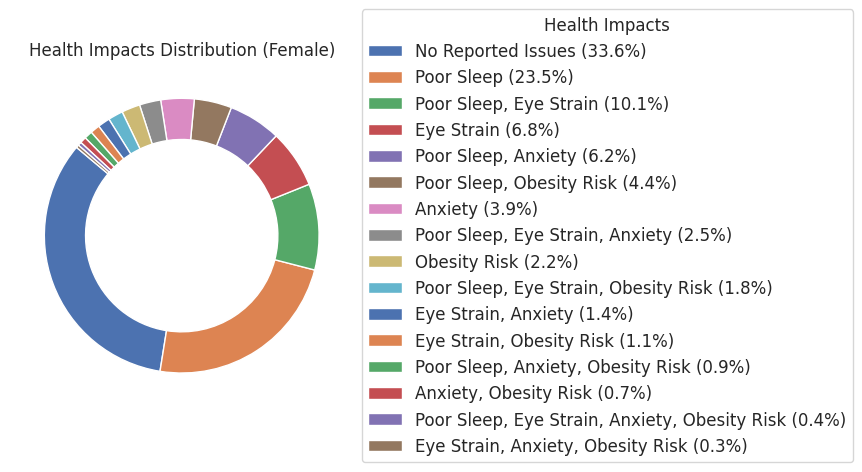

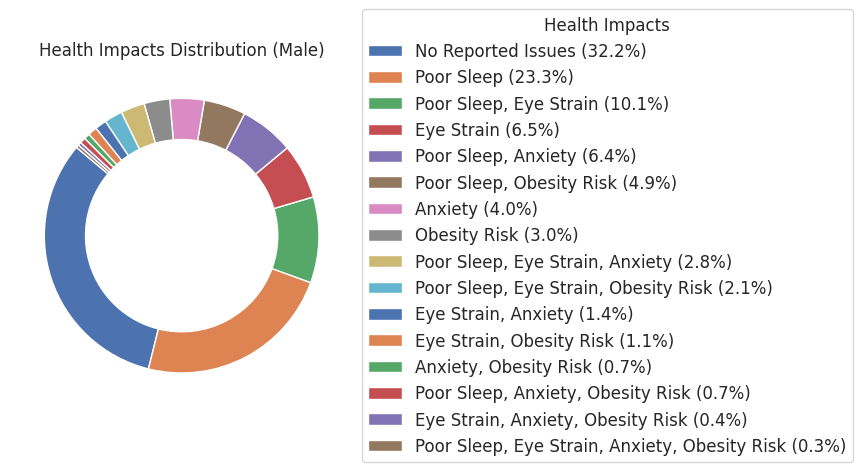

In [13]:

def plot_awareness_donut(gender):
    awareness_counts = df[df['Gender'] == gender]['Health_Impacts'].value_counts()
    total = awareness_counts.sum()
    labels = [
        f'{cat} ({val/total:.1%})' for cat, val in zip(awareness_counts.index, awareness_counts.values)
    ]
    plt.figure(figsize=(8,6))
    wedges, _ = plt.pie(
        awareness_counts,
        labels=None,
        startangle=140,
        wedgeprops=dict(width=0.3)
    )
    plt.legend(
        wedges,
        labels,
        title="Health Impacts",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=12
    )
    plt.title(f'Health Impacts Distribution ({gender})')
    plt.tight_layout()
    plt.show()

# Plot for Female
plot_awareness_donut('Female')

# Plot for Male
plot_awareness_donut('Male')


Each donut represents one gender Female and Male displaying the percentage of responses for each health impact category. The chart makes it easy to compare how awareness or experience of screen-time-related health effects differs between genders.

From the visualization, we can identify which gender reports more negative health outcomes due to excessive screen time and which group appears less affected or more balanced.

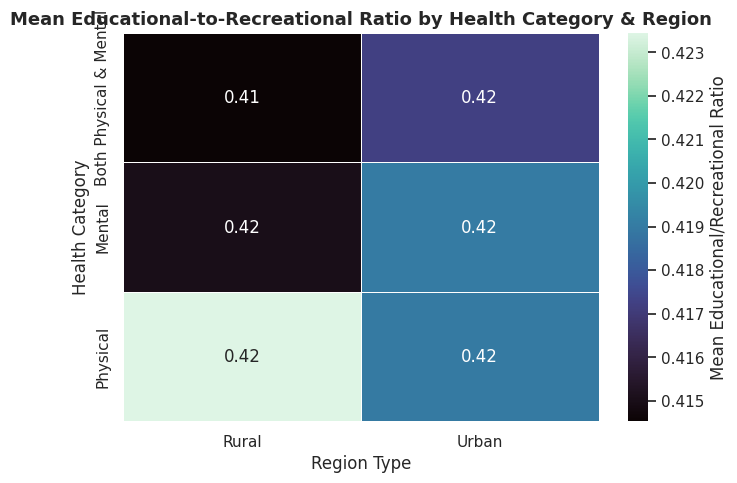

In [14]:
pivot = df.pivot_table(
    values='Educational_to_Recreational_Ratio',
    index='Health_Category',
    columns='Urban_or_Rural',
    aggfunc='mean'
)

plt.figure(figsize=(7,5))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.2f',
    cmap='mako',
    linewidths=0.5,
    cbar_kws={'label': 'Mean Educational/Recreational Ratio'}
)

plt.title('Mean Educational-to-Recreational Ratio by Health Category & Region', fontsize=13, fontweight='bold')
plt.xlabel('Region Type')
plt.ylabel('Health Category')
plt.tight_layout()
plt.show()


Chart: Mean Educational-to-Recreational Ratio by Health Category & Region: Heatmap

Purpose: Visualizes the average ratio of educational to recreational activities across different health categories and regions (urban vs. rural).

What it tells: You can quickly see which health categories and regions have higher or lower emphasis on educational vs. recreational activities.

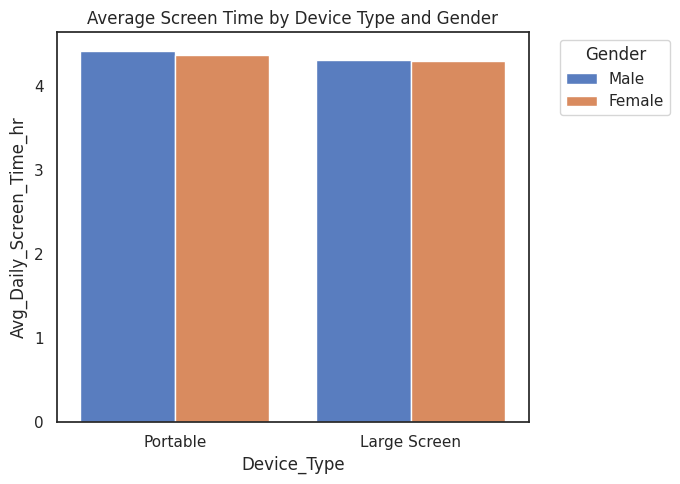

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x="Device_Type", y="Avg_Daily_Screen_Time_hr", data=df, hue="Gender", palette="muted", errorbar=None)
plt.title("Average Screen Time by Device Type and Gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()